## Prosper Loan Dataset Analysis

### - By Amazing-Grace Umoren

#### Introduction

> The Prosper Loan dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

#### Note
Most of the analysis in this notebook is centered toward the customer and only few towards the bank itself



### Data Wrangling

In [1]:
#import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#load dataset

data = pd.read_csv("prosperLoanData.csv")
data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
data.shape

(113937, 81)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
#data description
data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [8]:
#data 
sum(data.duplicated())

0

### Data Cleaning

In [15]:
#convert all date columns to datetime

# col = ["ListingCreationDate", "ClosedDate","LoanOriginationDate"]

# for i in col:
#     data[i] = pd.to_datetime(data[i], format='%d/%m/%Y')

In [16]:
data.ProsperPaymentsLessThanOneMonthLate.unique()

array([nan,  0.,  1.,  3.,  4.,  9.,  7.,  2.,  5., 17.,  6., 14., 20.,
        8., 11., 12., 15., 10., 27., 13., 24., 35., 18., 30., 19., 42.,
       16., 21., 22., 26., 34., 23., 29., 25., 36., 28., 32., 40., 33.,
       41., 39., 31.])

### Data Exploration

#### Univriate Exploartion

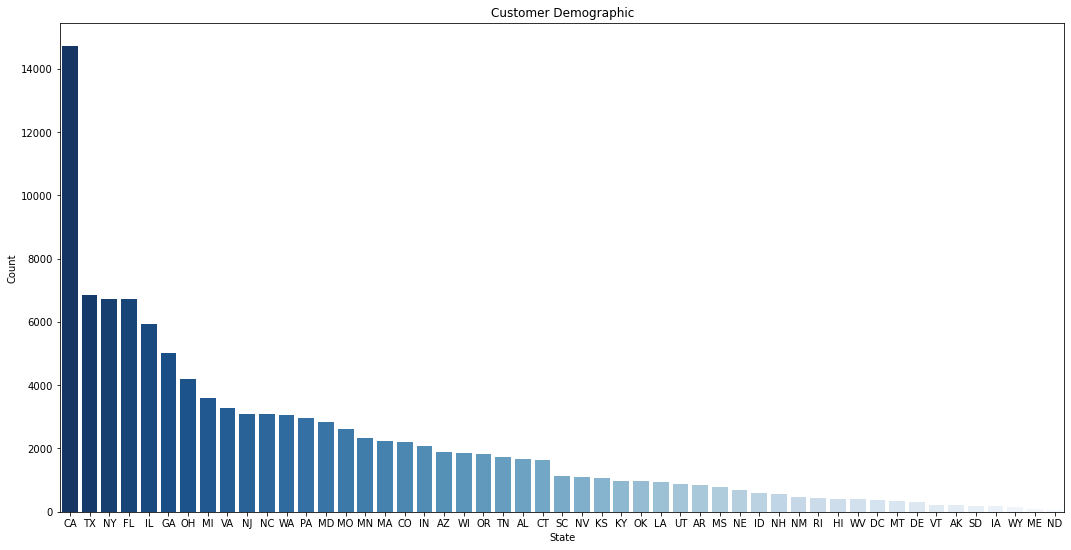

In [37]:
#Explore customer Demographics
plt.figure(figsize=(18,9))
sns.countplot(x='BorrowerState', data=data, palette='Blues_r' ,order=data['BorrowerState'].value_counts().index)
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Customer Demographic");

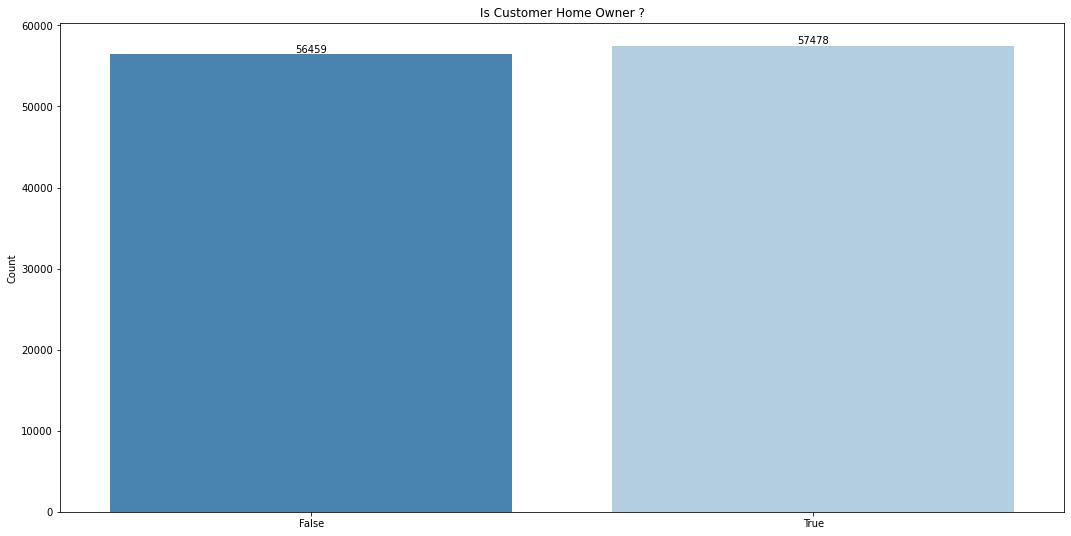

In [44]:
#Explore how many home owners there are


plt.figure(figsize=(18,9))
ax = sns.countplot(x='IsBorrowerHomeowner', data=data, palette='Blues_r')
for container in ax.containers:
            ax.bar_label(container)


plt.xlabel("")
plt.ylabel("Count")
plt.title("Is Customer Home Owner ?");

In [45]:
#Customers Income range

data.IncomeRange.unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

In [46]:
data.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [47]:
#clean the Income Range column and change Not employed to $0 and Not displayed to NaN

data.IncomeRange.replace({'Not employed':'$0','Not displayed':np.nan}, inplace=True)

In [48]:
data.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
$1-24,999          7274
$0                 1427
Name: IncomeRange, dtype: int64

Text(0.5, 1.0, 'Customers Income Range')

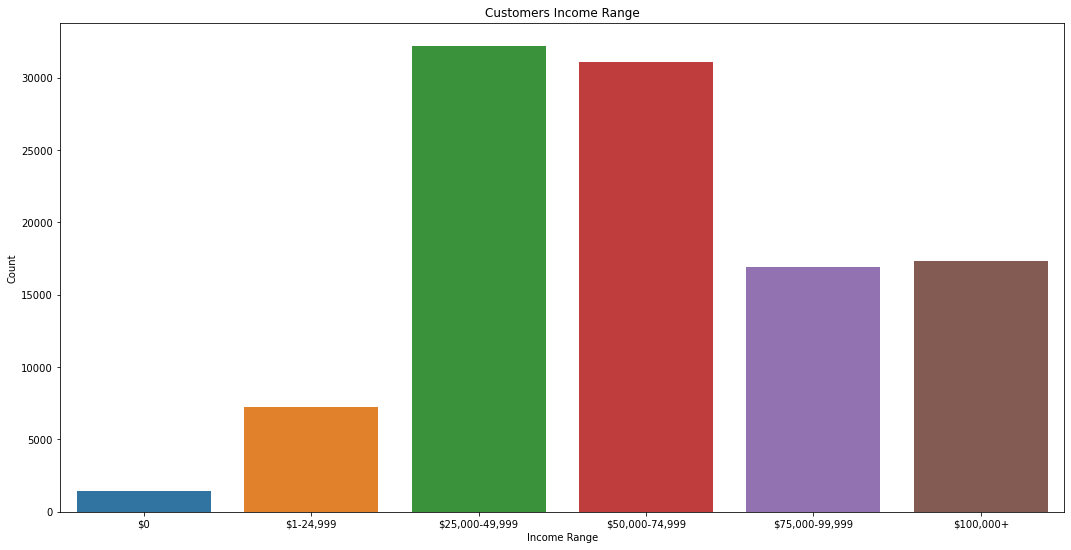

In [54]:
order = ['$0', '$1-24,999','$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']

plt.figure(figsize=(18,9))
sns.countplot(x='IncomeRange', data=data, order=order)
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Customers Income Range');

In [57]:
#evaluate customers occupation
data.Occupation.unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', nan, 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',


In [62]:
#Top 10 customers occupation
data.Occupation.value_counts().nlargest(10)

Other                       28617
Professional                13628
Computer Programmer          4478
Executive                    4311
Teacher                      3759
Administrative Assistant     3688
Analyst                      3602
Sales - Commission           3446
Accountant/CPA               3233
Clerical                     3164
Name: Occupation, dtype: int64

In [63]:
#Last 10 customers occupation
data.Occupation.value_counts().nsmallest(10)

Student - Technical School      16
Judge                           22
Student - Community College     28
Student - College Freshman      41
Dentist                         68
Student - College Sophomore     69
Tradesman - Plumber            102
Student - College Junior       112
Tradesman - Carpenter          120
Homemaker                      120
Name: Occupation, dtype: int64

In [ ]:
cus